# **PREPARATION**

In [ ]:
# Fundamental classes
import numpy as np 
import pandas as pd 
import tensorflow as tf
import os
from tqdm import tqdm

# Image related
import cv2
from PIL import Image

#Visualization and evaluation
from sklearn import metrics 
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Modeling
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [ ]:
path = "/content/drive/MyDrive/TrafficSign/Train/"

In [ ]:
class Model(tensorflow.keras.models.Sequential):
  def __init__(self):
    super().__init__()
    self.model = tf.keras.models.Sequential()

  def build(self):
    self.model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
    self.model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
    self.model.add(MaxPool2D(pool_size=(2, 2)))
    self.model.add(Dropout(rate=0.25))
    self.model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    self.model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    self.model.add(MaxPool2D(pool_size=(2, 2)))
    self.model.add(Dropout(rate=0.25))
    self.model.add(Flatten())
    self.model.add(Dense(256, activation='relu'))
    self.model.add(Dropout(rate=0.5))
    self.model.add(Dense(43, activation='softmax'))
    self.model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  def train(self, x_train, y_train, x_val, y_val, epochs = 100, batch_size = 32):
    self.history = self.model.fit(x_train, y_train, epochs= epochs, batch_size= batch_size, validation_data= (x_val, y_val))

  def evaluate(self, x_test, y_test):
    test_loss, test_acc = self.model.evaluate(x_test, y_test)
    print("Total loss: ", test_loss)
    print("Model accuracy: ", test_acc)

  def predict(self, x_test):
    return self.model.predict(x_test)

  def summary(self):
    return self.model.summary()

  def save(self, name= "model"):
    return self.model.save(f"{name}.h5")

In [ ]:
def processing_data(path):
  data = []
  labels = []
  folders = os.listdir(path)
  for folder in tqdm(folders):
    folder_path = os.path.join(path, folder)
    files = os.listdir(folder_path)
    for file in files:
      img_path = os.path.join(folder_path, file)
      image = Image.open(img_path)
      image = image.resize((30,30))
      img = np.array(image)
      data.append(img)
      labels.append(folder)
  data = np.array(data)
  labels = np.array(labels)
  return data, labels

# **LOADING DATA**

In [ ]:
data, label = processing_data(path)

100%|██████████| 43/43 [07:57<00:00, 11.11s/it]


In [ ]:
print(data.shape)
print(label.shape)

(39239, 30, 30, 3)
(39239,)


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(data, label, test_size= 0.2)

In [ ]:
y_train = to_categorical(y_train, 43)
y_valid = to_categorical(y_valid, 43)

# **CREATE AND TRAINING MODEL**

In [ ]:
model = Model()

In [ ]:
model.build()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [ ]:
history = model.train(X_train, y_train, X_valid, y_valid)

Epoch 1/100
981/981 [==============================] - 110s 111ms/step - loss: 2.0545 - accuracy: 0.4590 - val_loss: 0.8189 - val_accuracy: 0.8071
Epoch 2/100
981/981 [==============================] - 105s 107ms/step - loss: 0.8401 - accuracy: 0.7459 - val_loss: 0.2867 - val_accuracy: 0.9151
Epoch 3/100
981/981 [==============================] - 105s 107ms/step - loss: 0.5290 - accuracy: 0.8395 - val_loss: 0.1719 - val_accuracy: 0.9512
Epoch 4/100
981/981 [==============================] - 105s 107ms/step - loss: 0.4170 - accuracy: 0.8720 - val_loss: 0.1391 - val_accuracy: 0.9601
Epoch 5/100
981/981 [==============================] - 106s 108ms/step - loss: 0.3684 - accuracy: 0.8894 - val_loss: 0.1254 - val_accuracy: 0.9648
Epoch 6/100
981/981 [==============================] - 106s 108ms/step - loss: 0.3338 - accuracy: 0.8992 - val_loss: 0.1302 - val_accuracy: 0.9588
Epoch 7/100
981/981 [==============================] - 105s 107ms/step - loss: 0.2927 - accuracy: 0.9110 - val_loss: 0

# **EVALUATION**

In [ ]:
model.evaluate(X_valid, y_valid)

246/246 [==============================] - 7s 29ms/step - loss: 0.0429 - accuracy: 0.9888
Total loss:  0.04286579415202141
Model accuracy:  0.9887869358062744


In [ ]:
his = model.history.history

In [ ]:
train_loss, val_loss = his['loss'], his['val_loss']
train_acc, val_acc = his['accuracy'], his['val_accuracy']

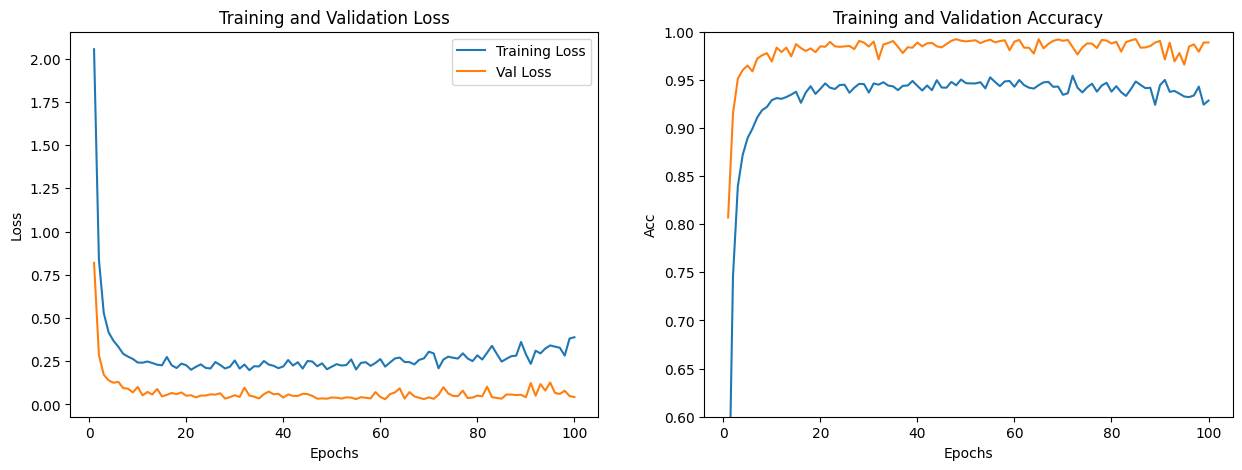

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
epoch_runs = [i+1 for i in range(100)]
ax1.plot(epoch_runs, train_loss, label="Training Loss")
ax1.plot(epoch_runs, val_loss, label="Val Loss")
ax1.set(title='Training and Validation Loss', xlabel='Epochs', ylabel='Loss')
ax1.legend()

ax2.plot(epoch_runs, train_acc, label="Training Acc")
ax2.plot(epoch_runs, val_acc, label="Val Acc")
ax2.set(title='Training and Validation Accuracy', xlabel='Epochs', ylabel='Acc', ylim=[0.6, 1])
plt.show()

In [ ]:
model.save()

# **TESTING**

In [ ]:
model = tf.keras.models.load_model('model.h5')

In [ ]:
y_test = pd.read_csv('/content/drive/MyDrive/TrafficSign/Test.csv')

In [ ]:
y_test

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png
...,...,...,...,...,...,...,...,...
12625,42,41,5,6,37,36,12,Test/12625.png
12626,50,51,6,5,45,46,33,Test/12626.png
12627,29,29,6,6,24,24,6,Test/12627.png
12628,48,49,5,6,43,44,7,Test/12628.png


In [ ]:
images = y_test['Path']
labels = y_test['ClassId']

In [ ]:
data = []

for img in tqdm(images):
    image = Image.open('/content/drive/MyDrive/TrafficSign/'+img)
    image = image.resize([30, 30])
    data.append(np.array(image))
  
X_test=np.array(data)

100%|██████████| 12630/12630 [04:26<00:00, 47.42it/s] 


In [ ]:
X_test.shape

(12630, 30, 30, 3)

In [ ]:
pred = np.argmax(model.predict(X_test), axis=-1)

print(classification_report(labels, pred))

395/395 [==============================] - 10s 26ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.97      0.98      0.97       720
           2       0.97      0.98      0.97       750
           3       0.97      0.92      0.95       450
           4       0.99      0.96      0.97       660
           5       0.83      0.96      0.89       630
           6       0.98      0.83      0.90       150
           7       0.98      0.95      0.97       450
           8       0.94      0.96      0.95       450
           9       0.98      1.00      0.99       480
          10       1.00      0.96      0.98       660
          11       0.95      0.93      0.94       420
          12       0.98      0.98      0.98       690
          13       0.99      0.99      0.99       720
          14       1.00      0.99      0.99       270
          15       0.97      0.99      0.98       210
          16       0.99 